<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#분류평가" data-toc-modified-id="분류평가-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>분류평가</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matris(혼돈행렬,-오차행렬)" data-toc-modified-id="Confusion-Matris(혼돈행렬,-오차행렬)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Confusion Matris(혼돈행렬, 오차행렬)</a></span></li><li><span><a href="#평가-지표" data-toc-modified-id="평가-지표-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>평가 지표</a></span></li><li><span><a href="#정밀도-및-재현율-활용-시-유의사항" data-toc-modified-id="정밀도-및-재현율-활용-시-유의사항-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>정밀도 및 재현율 활용 시 유의사항</a></span></li><li><span><a href="#Precision/Recall-Trade-off" data-toc-modified-id="Precision/Recall-Trade-off-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Precision/Recall Trade-off</a></span></li><li><span><a href="#ROC-Curve,-AUC" data-toc-modified-id="ROC-Curve,-AUC-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>ROC Curve, AUC</a></span></li></ul></li></ul></div>

# 분류평가
- 정확도만으로 불균형한 레이블 데이터 세트에서 평가지표로 사용하기에는 부적합
- 정확도가 가지는 분류 평가 지표로의 한계점을 극복하기 위해 여러가지 분류 지표와 함께 적용해야 함

## Confusion Matris(혼돈행렬, 오차행렬)
- 이진분류에서 성능 지표로 잘 활용되는 오차행렬은 학습된 분류 모델이 예측을 수행하면 얼마나 혼동될 수 있는지도 함께 보여주는 지표
- 이진 빈류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 보여줌

## 평가 지표
- TP, FP, FN, TN는 예측클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결함에 따라 결정
- 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 N/P는 예측 결과값이 부정/긍정을 의미
- 정확도 = (TP+TN)/(TP + TN + FP + FN)
- 정밀도 = TP/(TP + FP) : P로 예측한 것 중에서 실제도 P
- 재현율 = TP/(TP + FN) : 실제 P인 것 중에서 예측도 P
- F1 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율) : 정밀도와 재현율이 어느 한쪽으로 치우지지 않는 수치를 나타낼때 높아짐
- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점에 맞춘 평가 지표
- 재현율이 중요 지표인 경우 : 양성 데이터를 음성으로 잘못 판단하여 업무상 큰 영향이 발생하는 경우(암진단, 보험사기)
- 정밀도가 더 중요한 지표인 사례 : 스팸 메일 여부 판단하는 경우로 스팸메일이 아닌데 스팸 매일로 분류해서 업무 차질발생

## 정밀도 및 재현율 활용 시 유의사항
- 정밀도와 재현율 성능 수치는 어느 한쪽만 참조하면 극단적인 수치 조작이 가능
- 정밀도 100%가 되는 방법 : 확실한 기준이 되는 경우만 P로 예측하고 나머지는 모두 N로 예측 TP/(TP + FP) = 1
- 재현율이 100%가 되는 방법 : 실제 양성 1000명중 30명 TP/(TP+FN) = 30/(30+0)=1
- 분류가 정밀도, 재현율 중 하나에 상대적인 중요도를 부여할 수 있지만 하나만 강조해서는 안됨
- 암 예측 모델에서 재현율을 높인다고 주로 양성만 판정한다면 환자의 불만과 불평이 커지게 됨

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test,pred)
    print(f'오차행렬:\n {confusion} ')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)} \n')

In [65]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

def fillnas(df):
    def callname(x):
        m = re.compile('[A-Za-z]+[.]')
        p = re.findall(m,x)
        return p[0]
    
    df['Callname']=df.Name.apply(lambda x:callname(x))
    df1 = df.loc[df.Age.isnull()]
    age_nulllist = list(set(df1.Callname.values.tolist()))
    df2 = df.loc[df.Age.notnull()]
    pivot = pd.pivot_table(df2, index = 'Callname', values = 'Age',aggfunc = 'mean')
    
    for age in age_nulllist:
        df.loc[(df.Age.isnull())&(df.Callname == age),['Age']]=(pivot.loc[age][0])
        
    df['Embarked'].fillna(method = 'ffill',inplace=True)
    df3 = df.loc[df.Cabin.notnull()]
    df3['Cabins'] = df3['Cabin'].str[:1]
    df4 = df.loc[df.Cabin.isnull()]
    
    for i in range(1,4):
        df33 = df3.loc[df3.Pclass == i]
        cabin_fill_list=list(set(df33.Cabins.values.tolist()))
        df44 = df4.loc[df4.Pclass == i]
        fill_index = list(df44.index)
        for index in fill_index:
            df.loc[index,'Cabin'] = np.random.choice(cabin_fill_list)     
    return df

def drop_feat(df):
    df.drop(['PassengerId','Name','Ticket','Callname'],axis=1,inplace = True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    scaler = MinMaxScaler()
    scaler.fit(df[['Fare']])
    fare_scaled = scaler.transform(df[['Fare']])
    df['Fare'] = fare_scaled
    return df

def transform_features(df):
    df = fillnas(df)
    df = drop_feat(df)
    df = format_features(df)
    return df

In [66]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
t_df = pd.read_csv('./dataset/train.csv')
y_t_df = t_df['Survived']
X_t_df = t_df.drop('Survived',axis=1)
X_t_df = transform_features(X_t_df)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X_t_df,y_t_df,test_size=0.2, random_state=11) 
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬:
 [[107  11]
 [ 15  46]] 
정확도: 0.8547, 정밀도: 0.807, 재현율: 0.7541 



In [68]:
TN = 108; FP=10; FN=15; TP=46
precision = TP/(TP + FP)
recall = TP/(TP + FN)
print(f'''
accuracy : {(TP+TN)/(TP + TN + FP + FN)}
precision : {TP/(TP + FP)}
recall : {TP/(TP + FN)}
F1 score : {2*(precision*recall)/(precision+recall)}
''')


accuracy : 0.8603351955307262
precision : 0.8214285714285714
recall : 0.7540983606557377
F1 score : 0.7863247863247863



## Precision/Recall Trade-off

In [69]:
pred_proba = lr_clf.predict_proba(X_test)
pred_proba  # 0과 1이 될 확률
pred=lr_clf.predict(X_test)
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
pred_proba_result

array([[0.52990104, 0.47009896, 0.        ],
       [0.88846285, 0.11153715, 0.        ],
       [0.88320811, 0.11679189, 0.        ],
       [0.85125679, 0.14874321, 0.        ],
       [0.83906236, 0.16093764, 0.        ],
       [0.85962837, 0.14037163, 0.        ],
       [0.89512234, 0.10487766, 0.        ],
       [0.20385831, 0.79614169, 1.        ],
       [0.76692351, 0.23307649, 0.        ],
       [0.34263541, 0.65736459, 1.        ],
       [0.89319267, 0.10680733, 0.        ],
       [0.87945417, 0.12054583, 0.        ],
       [0.88948883, 0.11051117, 0.        ],
       [0.89508091, 0.10491909, 0.        ],
       [0.53395426, 0.46604574, 0.        ],
       [0.85462016, 0.14537984, 0.        ],
       [0.91019029, 0.08980971, 0.        ],
       [0.68487804, 0.31512196, 0.        ],
       [0.70040491, 0.29959509, 0.        ],
       [0.1660726 , 0.8339274 , 1.        ],
       [0.72070916, 0.27929084, 0.        ],
       [0.64628294, 0.35371706, 0.        ],
       [0.

In [70]:
from sklearn.preprocessing import Binarizer
X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)
# 임계치

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [71]:
custom_treshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_treshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
# pred_proba_1
get_clf_eval(y_test,custom_predict)

오차행렬:
 [[107  11]
 [ 15  46]] 
정확도: 0.8547, 정밀도: 0.807, 재현율: 0.7541 



In [72]:
# 분류 결정 임계값을 0.5 -> 0.4
custom_treshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_treshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
# pred_proba_1
get_clf_eval(y_test,custom_predict)

오차행렬:
 [[98 20]
 [10 51]] 
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361 



In [73]:
custom_treshold = [0.35,0.4,0.45,0.5,0.52,0.55,0.57,0.60,0.65]

for treshold in custom_treshold:
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)
    binarizer = Binarizer(threshold=treshold).fit(pred_proba_1)
    custom_predict = binarizer.transform(pred_proba_1)
    print(f'현재 treshold 값: {treshold}')
    get_clf_eval(y_test,custom_predict)

현재 treshold 값: 0.35
오차행렬:
 [[92 26]
 [ 7 54]] 
정확도: 0.8156, 정밀도: 0.675, 재현율: 0.8852 

현재 treshold 값: 0.4
오차행렬:
 [[98 20]
 [10 51]] 
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361 

현재 treshold 값: 0.45
오차행렬:
 [[102  16]
 [ 12  49]] 
정확도: 0.8436, 정밀도: 0.7538, 재현율: 0.8033 

현재 treshold 값: 0.5
오차행렬:
 [[107  11]
 [ 15  46]] 
정확도: 0.8547, 정밀도: 0.807, 재현율: 0.7541 

현재 treshold 값: 0.52
오차행렬:
 [[109   9]
 [ 15  46]] 
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541 

현재 treshold 값: 0.55
오차행렬:
 [[110   8]
 [ 15  46]] 
정확도: 0.8715, 정밀도: 0.8519, 재현율: 0.7541 

현재 treshold 값: 0.57
오차행렬:
 [[112   6]
 [ 16  45]] 
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377 

현재 treshold 값: 0.6
오차행렬:
 [[113   5]
 [ 17  44]] 
정확도: 0.8771, 정밀도: 0.898, 재현율: 0.7213 

현재 treshold 값: 0.65
오차행렬:
 [[115   3]
 [ 21  40]] 
정확도: 0.8659, 정밀도: 0.9302, 재현율: 0.6557 



In [74]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
print(f'f1 socore : {f1}')

f1 socore : 0.7796610169491526


In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    print(f'오차행렬:\n {confusion} ')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)}, f1_score :{round(f1,4)} \n')

In [13]:
#[과제] 임계값을 0~1사이로 변경시킬때 정밀도와 재현율의 변화 추세를 시각화하여 나타내시오

[0.10038006 0.10278968 0.10487766 0.1049111  0.10491909 0.1061609
 0.10680733 0.11045856 0.11051117 0.11139882 0.11153715 0.11679189
 0.11679284 0.11780206 0.12054583 0.12147259 0.12273657 0.12298865
 0.12338676 0.12524674 0.12880867 0.12946447 0.12961841 0.12980145
 0.13058807 0.13202831 0.13263146 0.13701587 0.13701615 0.13784584
 0.14037163 0.14078438 0.14334172 0.14537984 0.14634221 0.14667293
 0.14837062 0.14874321 0.14999797 0.150793   0.15747902 0.16093764
 0.1656742  0.18922086 0.19703121 0.19821202 0.21327649 0.21447684
 0.22150414 0.23101681 0.23307649 0.23625845 0.23650492 0.24770553
 0.2482687  0.25951877 0.27534905 0.27929084 0.28202775 0.28286192
 0.29867999 0.29959509 0.30015408 0.31512196 0.31718052 0.33054478
 0.33127087 0.34016018 0.35021697 0.35371706 0.35624478 0.36343909
 0.36491082 0.36505668 0.3716075  0.38657048 0.39245985 0.41960666
 0.425515   0.42567811 0.44285422 0.44699647 0.44985814 0.45634205
 0.45766    0.46604574 0.47009896 0.48526196 0.48580607 0.48604

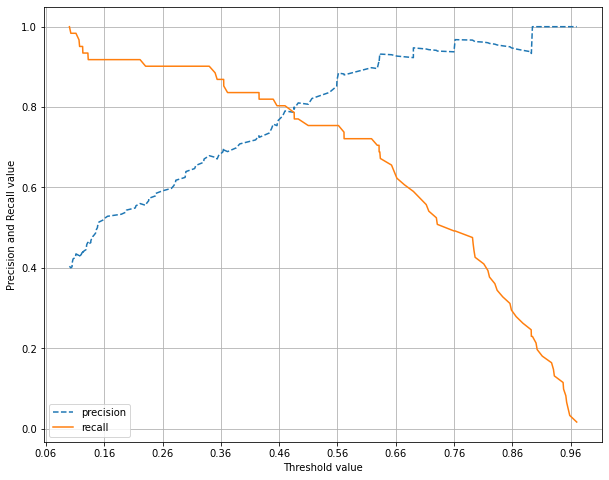

In [83]:
from sklearn.metrics import precision_recall_curve
precision,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
plt.figure(figsize=(10,8))
print(thresholds)
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precision[0:threshold_boundary],linestyle='--',label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
start,end=plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()

## ROC Curve, AUC
- 수신자 판단 곡선이라고 하며 ML의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표
- FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선으로 FPR = 1 - TNR(특이성) TPR은 재현율(민감도)를 나타냄
- TNR = TN/(TN+FP)이며 FPR은 FP/(TN+FP)
- ROC곡선은 FPR을 0부터 1까지 변경하면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR의 변화 값을 구함
- FPR을 0에서 1까지 변경하는 것은 P 예측값을 결정하는 기준인 분류 결정 임계값을 변경하면 됨
- FPR을 0으로 만들려면 임계값을 1로 지정 반대로 1로 만들려면 임계값을 0으로 지정

In [77]:
import matplotlib.pylab as plt
from sklearn.metrics import roc_curve
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
def roc_curve_plot(y_test,pred_proba_c1):
    fprs,tprs,thresholds = roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

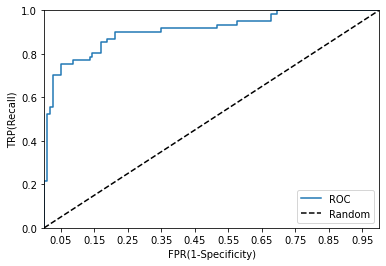

In [15]:
roc_curve_plot(y_test,pred_proba_c1)

In [16]:
from sklearn.metrics import roc_auc_score
pred_proba=lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test,pred_proba)
roc_score

0.9090025006946374

In [17]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall= recall_score(y_test,pred)
    f1=f1_score(y_test, pred)
    roc_auc=roc_auc_score(y_test,pred_proba)
    print(f'오차행렬:\n {confusion} ')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율: {round(recall,4)},\
    f1_score :{round(f1,4)}, auc: {round(roc_auc,4)} \n')

In [18]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬:
 [[108  10]
 [ 15  46]] 
정확도: 0.8603, 정밀도: 0.8214, 재현율: 0.7541,    f1_score :0.7863, auc: 0.909 



In [ ]:
[과제] train.csv 파일을 불러와서 분류모델링 평가를 아래와 같이 수행하세요.
- dt 모델을 적용하고 GridSearchCV를 사용, 교차검증과 성능 개선을 위한 하이퍼파라미터 튜닝
- accuracy에 추가하여 confusion matrix, accuracy, precision, recall, roc auc score 평가

In [61]:
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Binarizer
import pandas as pd
from sklearn.metrics import precision_recall_curve
#임계값 변경해 가면서 출력
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for treshold in thresholds:
        binarizer = Binarizer(threshold=treshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'현재 treshold 값: {treshold}')
        get_clf_eval(y_test,custom_predict)

#출력
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도: {round(accuracy,2)}, 정밀도: {round(precision,2)}, 재현율: {round(recall,2)}, F1: {round(f1,2)}, AUC:{round(roc_auc,2)}\n')
    
def get_category(age):
    cat = ''
    if age < 10:
        cat = 'Child'
    elif 10 <= age < 20:
        cat = 'Teenage'
    elif 20 <= age < 30:
        cat = 'Twenty'
    elif 30 <= age < 40:
        cat = 'Thirty'
    elif 40 <= age < 50:
        cat = 'Forty'
    elif 10 <= age < 60:
        cat = 'Fifty'
    else:
        cat = 'Elderiy'
    return cat

def drop_feature(df):
    df.drop(['SibSp','Parch','Ticket', 'Name', 'PassengerId','Cabin','Age', 'Title','Fare','Fare_bins'], axis=1,inplace=True)
    return df
def fillna(df):
    df['Age'] = df.groupby(['Sex', 'Title'])['Age'].apply(lambda x: x.fillna(x.mean()))
    df['Embarked'].fillna('S', inplace=True)
    return df
def add_feature(df):
    df['Title'] = df['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(0).strip())
    df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
    _, bins = np.histogram(df.Fare, bins=5)
    df['Fare_bins'] = pd.cut(x=df.Fare, bins=bins, labels=[0, 1, 2, 3, 4], include_lowest=True)
    df['Family'] = df['SibSp']+df['Parch']
    df.loc[df['Family']>1 ,'Family'] = 1
    return df
def pre_treatment(df):
    add_feature(df)
    fillna(df)
    drop_feature(df)
    return df
def run(df):
    df1 = df.copy()
    df1 = df.drop(['Survived'],axis=1)
    df1['Pclass'] = df1['Pclass'].astype('str')
    df1['Family'] = df1['Family'].astype('str')
    df1 = pd.get_dummies(df1)
    display(df1)
    X_train, X_test, y_train, y_test = train_test_split(df1, df.Survived, test_size=0.2,random_state=121)
    dtree = RandomForestClassifier(random_state=121)
    parameters = {'max_depth': [3,4,5],
                  'min_samples_split': [2, 3, 4]}
    grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)
    grid_dtree.fit(X_train, y_train)
    estimator = grid_dtree.best_estimator_
    pred = estimator.predict(X_test)
    print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
    print(f'GridSearchCV 최고 정확도 : {grid_dtree.best_score_.round(3)}')
    print(f'데스트 정확도 : {accuracy_score(y_test, pred)}\n')
    thresholds = [0.45,0.46,0.47,0.48,0.49, 0.5,0.51,0.52,0.53,0.54, 0.55,0.56,0.57,0.58,0.59, 0.60]
    pred_proba = estimator.predict_proba(X_test)
    get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


precision,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
plt.figure(figsize=(10,8))
print(thresholds)
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precision[0:threshold_boundary],linestyle='--',label='precision')
plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
start,end=plt.xlim()
plt.xticks(np.round(np.arange(start,end,0.1),2))
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()
plt.grid()
plt.show()
    
    
df = pd.read_csv('./dataset/train.csv')
pre_treatment(df)
run(df)

# 랜덤에 따라 테스트 정확도가 달라집니다. 재현율 정밀도 부분은 값이 잘 나오지 않는걸 보아 뭔가 많이 잘못한거 같습니다.
# 판단기준을 가져야 함

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_cat_Child,Age_cat_Elderiy,Age_cat_Fifty,Age_cat_Forty,Age_cat_Teenage,Age_cat_Thirty,Age_cat_Twenty,Family_0,Family_1
0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0
3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
887,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0
888,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1
889,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0


GridSearchCV 최적 파라미터 : {'max_depth': 5, 'min_samples_split': 3}
GridSearchCV 최고 정확도 : 0.816
데스트 정확도 : 0.8044692737430168

현재 treshold 값: 0.45
오차행렬
[[85 22]
 [22 50]]
정확도: 0.75, 정밀도: 0.69, 재현율: 0.69, F1: 0.69, AUC:0.74

현재 treshold 값: 0.46
오차행렬
[[86 21]
 [22 50]]
정확도: 0.76, 정밀도: 0.7, 재현율: 0.69, F1: 0.7, AUC:0.75

현재 treshold 값: 0.47
오차행렬
[[95 12]
 [23 49]]
정확도: 0.8, 정밀도: 0.8, 재현율: 0.68, F1: 0.74, AUC:0.78

현재 treshold 값: 0.48
오차행렬
[[98  9]
 [23 49]]
정확도: 0.82, 정밀도: 0.84, 재현율: 0.68, F1: 0.75, AUC:0.8

현재 treshold 값: 0.49
오차행렬
[[99  8]
 [26 46]]
정확도: 0.81, 정밀도: 0.85, 재현율: 0.64, F1: 0.73, AUC:0.78

현재 treshold 값: 0.5
오차행렬
[[99  8]
 [27 45]]
정확도: 0.8, 정밀도: 0.85, 재현율: 0.62, F1: 0.72, AUC:0.78

현재 treshold 값: 0.51
오차행렬
[[101   6]
 [ 29  43]]
정확도: 0.8, 정밀도: 0.88, 재현율: 0.6, F1: 0.71, AUC:0.77

현재 treshold 값: 0.52
오차행렬
[[102   5]
 [ 29  43]]
정확도: 0.81, 정밀도: 0.9, 재현율: 0.6, F1: 0.72, AUC:0.78

현재 treshold 값: 0.53
오차행렬
[[102   5]
 [ 29  43]]
정확도: 0.81, 정밀도: 0.9, 재현율: 0.6, F1: 0.72, AUC:0.78

현재 tre

[과제] diabetes.csv 데이터세트를 이용해 다음사항을 수행하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 작성하고 평가하세요.

- SkinThickness 와 Insulin의 0 값은 상당히 많기 때문에 일괄 삭제가 어려우며 평균값으로 대체
- 정확도, 정밀도, 재현율, F1 Score, ROC_AUC Score를 포함하는 평가지표 사용자 함수 작성
- 정밀도와 재현율의 임곗값에 따른 값 변화를 곡선 형태로 시각화
- 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 임계값 산출
- 산출된 임계값을 적용한 평가

※ 피처 정보
- 'Pregnancies'(임신 횟수), 'Glucose'(포도당 부하 검사 수치), 'BloodPressure'(혈압), 'SkinThickness'(팔 삼두근 뒤쪽의 피하지방 측정값, 'Insulin'(혈청 인슈린), 'BMI'(체질량 지수), 'DiabetesPedigreeFunction'(당뇨 내력 가중치 값), 'Age', 'Outcome'
데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터임.
고립된 지역에서 인디언 고유의 혈통이 지속돼 왔지만 20세기 후반에 들어서면서 서구화된 식습관으로 많은 당뇨 환자 발생

In [102]:
df=pd.read_csv('./dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [107]:
df.value_counts('BMI')
display(df.loc[df['BMI']==0])
display(df.loc[df['BloodPressure']==0])
display(df.loc[df['Glucose']==0])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


[도전과제]

아래는 백화점 고객의 1년 간 구매 데이터이다.

(가) 제공 데이터 목록
① y_train.csv : 고객의 성별 데이터 (학습용), CSV 형식의 파일
② X_train.csv, X_test.csv : 고객의 상품구매 속성 (학습용 및 평가용), CSV 형식의 파일
(나) 데이터 형식 및 내용
① y_train.csv (3,500명 데이터)
② X_train.csv (3,500명 데이터), X_test.csv (2,482명 데이터)

고객 3,500명에 대한 학습용 데이터(y_train.csv, X_train.csv)를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터(X_test.csv)에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 CSV 파일로 생성하시오.(제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

custid,gender
3500,0.267
3501,0.578
3502,0.885
․ ․ ․


성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, Feature Engineering, 분류 알고리즘 사용, 초매개변수 최적화, 모형 앙상블 등이 수반되어야 한다

In [7]:
import pandas as pd

In [62]:
X=pd.read_csv('./dataset/X_train.csv',encoding='CP949')
y=pd.read_csv('./dataset/y_train.csv',encoding='CP949')
X['실구매금액'] = X['총구매액']-X['환불금액']
df = pd.concat([X,y],axis=1,join='inner')
df = df.replace(np.nan,0)
df.loc[:, ~df.T.duplicated()]

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,실구매금액,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0,0
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,0.0,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,0.0,1
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,0.0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0,1
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,0.0,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,0.0,0


In [63]:
df['gender']=df['gender'].replace(0,'여성')
df['gender']=df['gender'].replace(1,'남성')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     3500 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
 10  실구매금액    3500 non-null   float64
 11  cust_id  3500 non-null   int64  
 12  gender   3500 non-null   object 
dtypes: float64(4), int64(6), object(3)
memory usage: 355.6+ KB


In [65]:
df

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,실구매금액,cust_id,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,61422840.0,0,여성
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,1836000.0,1,여성
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,0.0,2,남성
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16,0.0,3,남성
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85,0.0,4,여성
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0,0.0,3495,남성
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,23579000.0,3496,남성
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0,0.0,3497,여성
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39,0.0,3498,여성


In [66]:
#비율로 접근해 보아도 여성의 환불 횟수가 압도적으로 높음. 
#내점일수,내점당 구매건수는 여성이 높음, 주말방문비율은 남성이 높음.
df.groupby(['gender']).mean()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,실구매금액,cust_id
gender,,,,,,,,,,
남성,1746.905015,6.029865e+07,1.495320e+07,3.856970e+06,13.828267,2.726785,0.334714,22.279635,3.125196e+07,1746.905015
여성,1751.063645,1.109727e+08,2.250294e+07,1.096084e+07,22.522894,2.900148,0.290695,20.162088,6.880978e+07,1751.063645


In [71]:
import matplotlib.pylab as plt
import seaborn as sns

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def format_features(df):
    x = df
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return(df)

#모든 행을 살리는게 결과 값이 좋음.
X=df.drop(['주구매상품','주구매지점','gender'],axis=1)
y=df['gender']
X=format_features(X)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state=11)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
print(r_square)

ValueError: could not convert string to float: '여성'